# Mall Customer Segmentation 
## The owner of the mall wants you to create categories of customer to pitch in upselling the products and providing discount vouchers

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [ ]:
#Rules /Guidelines for Clustering Use-cases
# 1. Only Target Numeric Columns (Age, Annual Income, SpendingScore). Ensure Your data is complete 
#    and valid
# 2. Perform Visual EDA on numerical columns


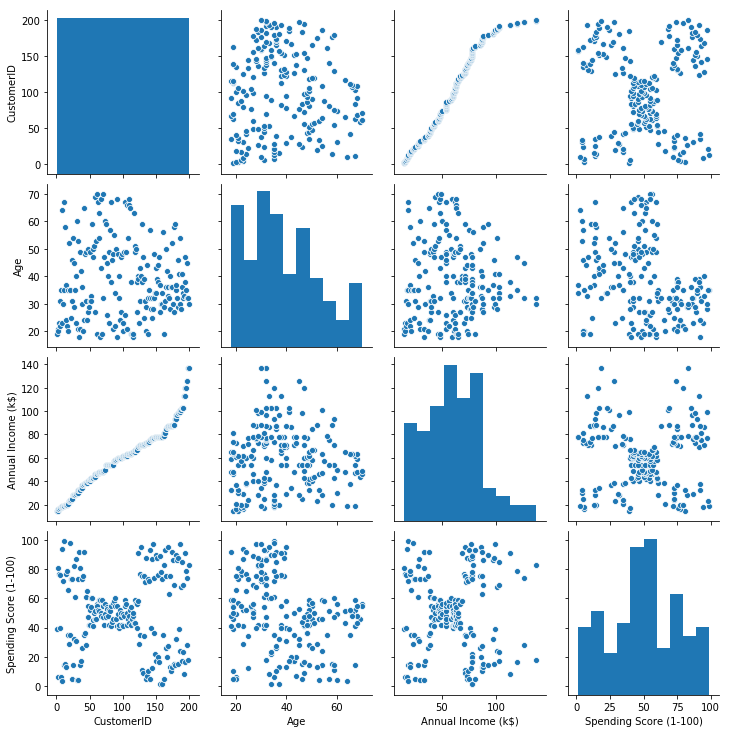

In [ ]:
sns.pairplot(data)

In [ ]:
#For Example
#1. Create Cluster using SpendingScore v/s Age (k = 2)
#2. Create Cluster using SpendingScore v/s Annual Income (k=5)

In [ ]:
#2. Create Cluster using SpendingScore v/s Annual Income (k=5)

features = data.iloc[:,[3,4]].values


In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

In [ ]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labelData = model.predict(features)

In [ ]:
finalDataset = pd.DataFrame(features,columns=['AnnualIncome','SpendingScore'])

In [ ]:
finalDataset['category']=labelData

In [ ]:
finalDataset.head()

AnnualIncome  SpendingScore  category
0            15             39         1
1            15             81         2
2            16              6         1
3            16             77         2
4            17             40         1

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


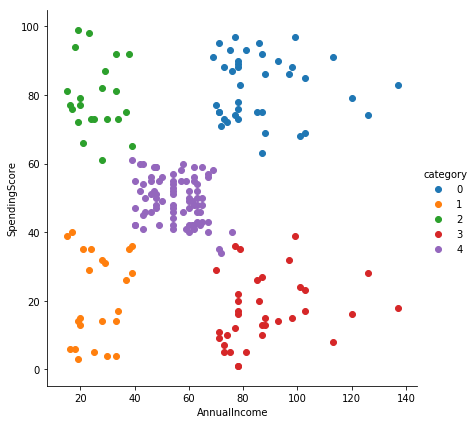

In [ ]:
sns.FacetGrid(finalDataset, hue='category', size=6)\
.map(plt.scatter,'AnnualIncome','SpendingScore')\
.add_legend()

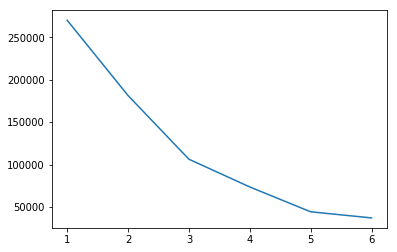

In [ ]:
#Verify whether the value of K is an ideal value or not

#Elbow Method --- Metric WCSS (Within Cluster Sum of Square)
wcss = []
for i in range(1,7):
    modelCheck = KMeans(n_clusters=i)
    modelCheck.fit(features)
    wcss.append(modelCheck.inertia_)
    
plt.plot(range(1,7),wcss)

In [ ]:
# k= 5
# KMeans
# 1. To fill missing labels
# 2. To Convert Multiclass classification use-case to Binary class usecase
# 3. We can create prediction model post kmeans using classification